# STAT679 Homework6

### Yixuan Wang
#### wang2688@wisc.edu

In [1]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

## Problem1

In [2]:
#1.1
def wigner_density(x):
    if x>=-2 and x<=2:
        result=np.sqrt(4-x**2)/(2*np.pi)
    else:
        result=0
    return result

In [3]:
wigner_density(0)

0.3183098861837907

In [21]:
#1.2
def generate_wigner(n):
    #error checking:
    if not isinstance(n,int):
        raise TypeError('The argument should be an integer.')
    if n<=0:
        raise ValueError('The argument should be positive.')
        
    a=np.random.normal(0,1/n,(n,n))
    matrix=np.triu(a,1)+np.triu(a).T
    return matrix

In [38]:
generate_wigner(3)

array([[ 0.10496036,  0.33826612, -0.05919145],
       [ 0.33826612,  0.04076144,  0.04684299],
       [-0.05919145,  0.04684299, -0.23634924]])

In [22]:
#1.3
def get_spectrum(M):
    eigenvalue,featurevector=np.linalg.eig(M)
    return sorted(eigenvalue)

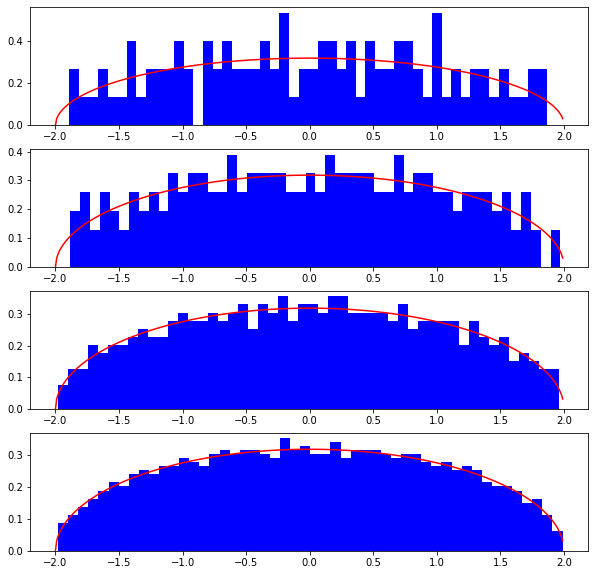

In [29]:
#1.4
#function value
x=np.arange(-2,2,0.01)
f=np.vectorize(wigner_density)
y=f(x)
#sample values
M1=generate_wigner(100)
eigen1=get_spectrum(M1)
norm1=(eigen1-np.mean(eigen1))/np.sqrt(np.var(eigen1))

M2=generate_wigner(200)
eigen2=get_spectrum(M2)
norm2=(eigen2-np.mean(eigen2))/np.sqrt(np.var(eigen2))

M3=generate_wigner(500)
eigen3=get_spectrum(M3)
norm3=(eigen3-np.mean(eigen3))/np.sqrt(np.var(eigen3))

M4=generate_wigner(1000)
eigen4=get_spectrum(M4)
norm4=(eigen4-np.mean(eigen4))/np.sqrt(np.var(eigen4))

#drawing plot
plt.figure(figsize=(10,10))

plt.subplot(411)
plt.hist(norm1,50,density=True,facecolor='blue')
plt.plot(x,y,color='red')

plt.subplot(412)
plt.hist(norm2,50,density=True,facecolor='blue')
plt.plot(x,y,color='red')

plt.subplot(413)
plt.hist(norm3,50,density=True,facecolor='blue')
plt.plot(x,y,color='red')

plt.subplot(414)
plt.hist(norm4,50,density=True,facecolor='blue')
plt.plot(x,y,color='red')

plt.savefig('wigner_plots.png')
plt.show()

According to the plots above, n has to be large than 1000 before the semicircular law appears to be a good fit.

## Problem2

In [5]:
#2.1
labels=np.load('labels.npy')
point=np.loadtxt('points.dlm')
point

array([[0.4579593 , 0.54352873],
       [0.08891206, 0.76618616],
       [0.1464601 , 0.78467006],
       [0.64990065, 0.19183258],
       [0.57086316, 0.40393525],
       [0.29572486, 0.58500418],
       [0.15027556, 0.80593204],
       [0.25960085, 0.67009997],
       [0.47471736, 0.34099282],
       [0.43924813, 0.48635789],
       [0.49324641, 0.2586415 ],
       [0.57028107, 0.50604562],
       [0.35078376, 0.47766205],
       [0.70058495, 0.28676208],
       [0.58608077, 0.43146247],
       [0.31866683, 0.53642412],
       [0.31731621, 0.68709491],
       [0.24563737, 0.58151459],
       [0.5904017 , 0.3461213 ],
       [0.58237811, 0.33313413],
       [0.19892317, 0.67976276],
       [0.57546381, 0.35036447],
       [0.46371709, 0.5295031 ],
       [0.32796263, 0.45138817],
       [0.6607364 , 0.44828526],
       [0.46272305, 0.39791724],
       [0.49184597, 0.54705932],
       [0.50921879, 0.4074183 ],
       [0.61658102, 0.30684193],
       [0.23957465, 0.78174214],
       [0.

(0.0, 1.0)

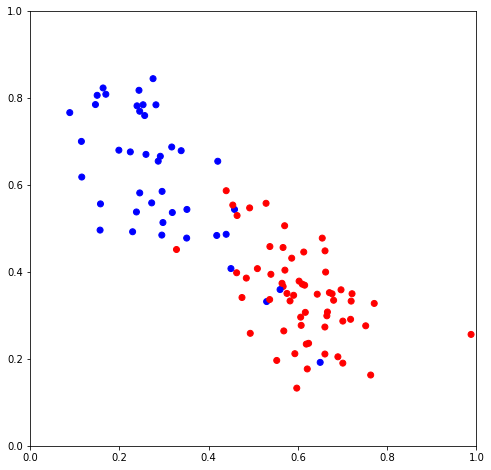

In [6]:
#2.2
#color list
color=[]
for item in labels:
    if item==1:
        color.append('red')
    if item==0:
        color.append('blue')

#drawing figures
plt.figure(figsize=(8,8))
plt.scatter(point[:,0],point[:,1],color=color)
plt.xlim(0,1)
plt.ylim(0,1)

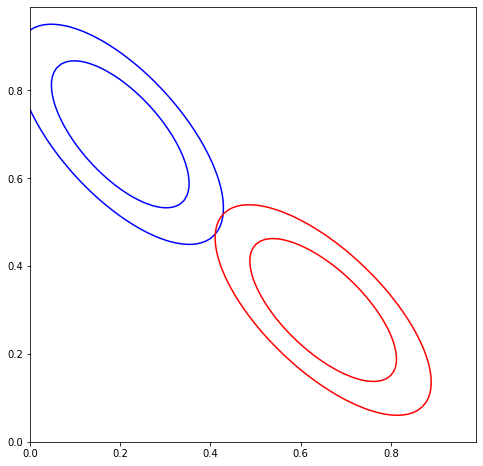

In [7]:
#2.3
from scipy.stats import chi2,multivariate_normal
#setting multivariate distribution
mu0=np.array([0.2,0.7])
sigma0=np.array([[0.015,-0.011],[-0.011,0.018]])
mu1=np.array([0.65,0.3])
sigma1=np.array([[0.016,-0.011],[-0.011,0.016]])

x=np.arange(0,1,0.01)
y=np.arange(0,1,0.01)
X,Y=np.meshgrid(x,y)

pos=np.empty(X.shape+(2,))
pos[:,:,0]=X
pos[:,:,1]=Y
Z0=multivariate_normal(mu0,sigma0).pdf(pos)
Z1=multivariate_normal(mu1,sigma1).pdf(pos)

plt.figure(figsize=(8,8))
plt.contour(X,Y,Z0,levels=[chi2.ppf(df=2,q=0.68),chi2.ppf(df=2,q=0.95)],colors='blue')
plt.contour(X,Y,Z1,levels=[chi2.ppf(df=2,q=0.68),chi2.ppf(df=2,q=0.95)],colors='red')

(0.0, 1.0)

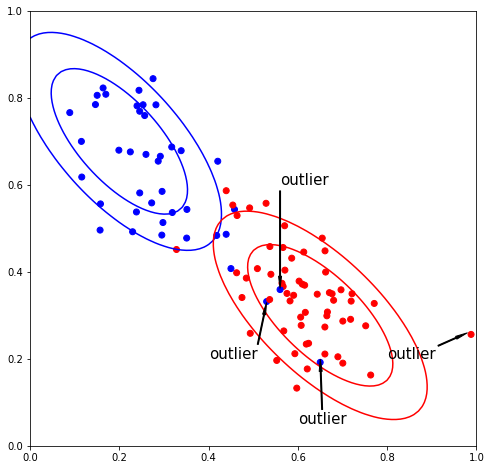

In [10]:
#2.4
plt.figure(figsize=(8,8))
plt.scatter(point[:,0],point[:,1],color=color)
plt.contour(X,Y,Z0,levels=[chi2.ppf(df=2,q=0.68),chi2.ppf(df=2,q=0.95)],colors='blue')
plt.contour(X,Y,Z1,levels=[chi2.ppf(df=2,q=0.68),chi2.ppf(df=2,q=0.95)],colors='red')

plt.annotate('outlier', xy = (0.65,0.2), xytext = (0.6,0.05),fontsize = 15, 
             arrowprops = dict(facecolor='black', shrink = 0.01, width = 1, headwidth = 3))
plt.annotate('outlier', xy = (0.56,0.36), xytext = (0.56,0.6),fontsize = 15, 
             arrowprops = dict(facecolor='black', shrink = 0.01, width = 1, headwidth = 3))
plt.annotate('outlier', xy = (0.53,0.33), xytext = (0.4,0.2),fontsize = 15, 
             arrowprops = dict(facecolor='black', shrink = 0.01, width = 1, headwidth = 3))
plt.annotate('outlier', xy = (0.98,0.26), xytext = (0.8,0.2),fontsize = 15, 
             arrowprops = dict(facecolor='black', shrink = 0.01, width = 1, headwidth = 3))
plt.xlim(0,1)
plt.ylim(0,1)

## Problem3

In [13]:
#3.1
def is_valid_board(arg):
    if not isinstance(arg,np.ndarray):
        return False
    if arg.ndim!=2:
        return False
    if arg.dtype!=np.bool_:
        return False
    return True

In [24]:
#3.2
def gol_step(board):
    if is_valid_board(board)==False:
        raise TypeError('The input board is not valid.')
    next_board=np.zeros((board.shape[0],board.shape[1]))
    for i,j in np.ndindex(board.shape):
        alive=np.sum(board[i-1:i+2,j-1:j+2])-board[i,j]*1
        if board[i,j]==True:
            if alive<2 or alive>3:
                next_board[i,j]=False
            if alive==2 or alive==3:
                next_board[i,j]=True
        else:
            if alive==3:
                next_board[i,j]=True
            else:
                next_board[i,j]=False
    return next_board.astype(bool)

In [29]:
#3.3
def draw_gol_board(board):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(board,cmap='binary')

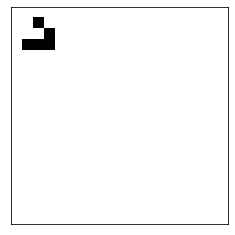

In [172]:
#3.4
board=np.array([[False]*20]*20)
board[1,2]=True
board[2,3]=True
board[3,1]=True
board[3,2]=True
board[3,3]=True
draw_gol_board(board)
plt.savefig('glider_board.png')

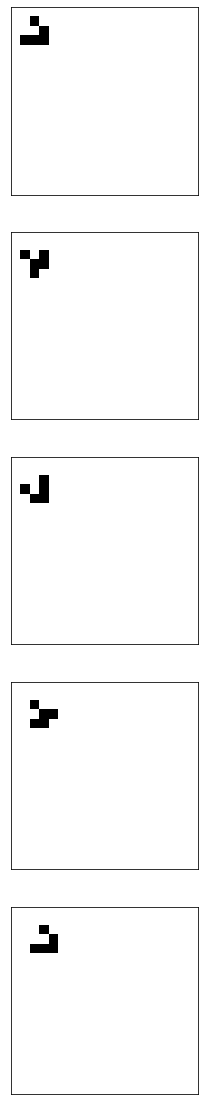

In [182]:
#3.5
board_list=[board]
for i in range(4):
    board_new=gol_step(board_list[i])
    board_list.append(board_new)


plt.figure(figsize=(5,20))
for i in range(len(board_list)):
    plt.subplot(511+i)
    draw_gol_board(board_list[i])
plt.savefig('glider_5steps.png')

In [179]:
len(board_list)

5